# **Final Project: Resolving Educational Institution Problems**

* Name: Mohammad Nurdin Prastya Hermansah
* Email: mohammadnurdin2001@gmail.com
* Dicoding ID: 2001nurdin

# **Preparation**

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import joblib
import math

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import files

## Data Loading

In [ ]:
# Dataset import from Dicoding GitHub Repository
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

# Read dataset
df = pd.read_csv(dataset_url, delimiter=';')
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


## Data Assesing

### **Informasi Dataset**

In [ ]:
# cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
# cek missing value
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [ ]:
# cek duplikasi data
print("Duplikasi data ada: ", df.duplicated().sum())

Duplikasi data ada:  0


In [ ]:
# Mengecek Nilai Unik pada Data
print(df.nunique())

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

#### 📋 **Ringkasan Dataset**

* **Jumlah entri**: 4424 baris
* **Jumlah fitur**: 37 kolom
* **Tipe data**:

  * `int64`: 29 kolom (terutama berisi data kategorikal dalam bentuk numerik dan angka bulat)
  * `float64`: 7 kolom (berisi nilai numerik kontinu seperti nilai, IPK, atau indikator ekonomi)
  * `object`: 1 kolom (`Status`, kemungkinan target klasifikasi)

---

#### 🎯 **Isi Kolom Secara Umum**

* **Data pribadi & latar belakang mahasiswa**:
  `Marital_status`, `Gender`, `Age_at_enrollment`, `Nacionality`, `Previous_qualification`, dll.

* **Data pendidikan & akademik**:
  `Course`, `Admission_grade`, `Tuition_fees_up_to_date`, `Scholarship_holder`,
  serta data detil nilai, evaluasi, dan keikutsertaan dalam mata kuliah semester 1 & 2.

* **Faktor sosial/ekonomi eksternal**:
  `Unemployment_rate`, `Inflation_rate`, `GDP`
  → bisa digunakan untuk analisis dampak faktor ekonomi pada kelulusan atau performa akademik.

* **Kolom target**:
  `Status` → satu-satunya kolom bertipe `object`, kemungkinan label klasifikasi (misalnya: "Graduated", "Dropout", dll).

---

#### ✅ **Kondisi Data**

* Tidak ada **missing values** (semua kolom memiliki 4424 non-null)
* Tidak ada **duplikasi data**
* Data siap untuk analisis atau modeling setelah:

  * Encoding kategori (jika diperlukan)
  * Scaling nilai numerik
  * Exploratory Data Analysis (EDA)
  * Menangani class imbalance (jika `Status` tidak seimbang)

In [ ]:
# statistil deskriptif data numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [ ]:
# statistik deskripftif data object
df.describe(include='object').T

,count,unique,top,freq
Status,4424,3,Graduate,2209


#### 📊 **Ringkasan Statistik Dataframe (4424 entri)**

* **Mayoritas mahasiswa belum menikah** (Marital\_status ≈ 1).
* **Application\_mode** sangat bervariasi, rata-rata mode pendaftaran sekitar 18.
* **Umumnya mendaftar sebagai pilihan utama** (Application\_order median = 1).
* **Kebanyakan kuliah di waktu siang** (Daytime\_evening\_attendance ≈ 0.89).
* **Sebagian besar memiliki kualifikasi sebelumnya yang rendah** (Previous\_qualification ≈ 4.57; sebagian besar = 1).
* **Nilai masuk rata-rata sekitar 127**, dan **nilai kualifikasi sebelumnya** ≈ 133.
* **Mayoritas berkebangsaan lokal** (Nacionality mayoritas = 1).
* **Pendidikan orang tua bervariasi**, rata-rata pada rentang 19–22.
* **Pekerjaan orang tua sangat bervariasi**, dengan beberapa outlier (hingga 194-195).
* **Sebagian besar mahasiswa bukan penyandang disabilitas atau kebutuhan khusus**.
* **\~88% mahasiswa membayar biaya kuliah tepat waktu**, \~11% memiliki tunggakan.
* **Sebagian kecil adalah pemegang beasiswa (\~25%)**.
* **Rata-rata usia saat masuk kuliah: 23 tahun**, dengan rentang 17–70 tahun.
* **Hanya \~2.5% mahasiswa internasional**.
* **Rata-rata mendaftar 6 mata kuliah per semester**, dan **meluluskan 4–5 mata kuliah**.
* **Rata-rata nilai per semester sekitar 10–12**.
* **Beberapa mahasiswa tidak dievaluasi untuk beberapa mata kuliah**.
* **Tingkat pengangguran dan inflasi bervariasi selama data diambil**, dengan rata-rata:

  * **Pengangguran**: \~11.6%
  * **Inflasi**: \~1.2%
  * **GDP rata-rata mendekati 0**, menandakan periode ekonomi stagnan/berfluktuasi.

## Data Cleaning

### Fitur Labeling Decoding

**Berikut Label Decoding yang akan diterapkan pada data yang sesuai dengan format ketentuan**

| Features | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
|----------|---|---|---|---|---|---|---|
| **Marital_status** | - | Single | Married | Widower | Divorced | Facto Union | Legally Seperated |
| **Daytime_evening_attendance** | Evening | Daytime | - | - | - | - | - |
| **Displaced** | No | Yes | - | - | - | - | - |
| **Educational_special_needs** | No | Yes | - | - | - | - | - |
| **Debtor** | No | Yes | - | - | - | - | - |
| **Tuition_fees_up_to_date** | No | Yes | - | - | - | - | - |
| **Gender** | Female | Male | - | - | - | - | - |
| **Scholarship_holder** | No | Yes | - | - | - | - | - |
| **International** | No | Yes | - | - | - | - | - |

<br>

<details>
<summary><b>Application_mode</b></summary>
1 - 1st Phase - General Contingent<br>
2 - Ordinance No. 612/93<br>
5 - 1st Phase - Special Contingent (Azores Island)<br>
7 - Holders of Other Higher Courses<br>
10 - Ordinance No. 854-B/99<br>
15 - International Student (Bachelor)<br>
16 - 1st phase - Special Contingent (Madeira Island)<br>
17 - 2nd phase - General Contingent<br>
18 - 3rd phase - General Contingent<br>
26 - Ordinance No. 533-A/99, Item B2 (Different Plan)<br>
27 - Ordinance No. 533-A/99, Item B3 (Other Institution)<br>
39 - Over 23 Years Old<br>
42 - Transfer<br>
43 - Change of Course<br>
44 - Technological Specialization Diploma Holders<br>
51 - Change of Institution/Course<br>
53 - Short Cycle Diploma Holders<br>
57 - Change of Institution/Course (International)<br>
</details>

<br>

<details>
<summary><b>Course</b></summary>
33 - Biofuel Production Technologies<br>
171 - Animation and Multimedia Design<br>
8014 - Social Service (Evening Attendance)<br>
9003 - Agronomy<br>
9070 - Communication Design<br>
9085 - Veterinary Nursing<br>
9119 - Informatics Engineering<br>
9130 - Equinculture<br>
9147 - Management<br>
9238 - Social Service<br>
9254 - Tourism<br>
9500 - Nursing<br>
9556 - Oral Hygiene<br>
9670 - Advertising and Marketing Management<br>
9773 - Journalism and Communication<br>
9853 - Basic Education<br>
9991 - Management (Evening Attendance)<br>
</details>

<br>

<details>
<summary><b>Previous_qualification</b></summary>
1 - Secondary Education<br>
2 - Higher Education - Bachelor's Degree<br>
3 - Higher Education - Degree<br>
4 - Higher Education - Master's<br>
5 - Higher Education - Doctorate<br>
6 - Frequency of Higher Education<br>
9 - 12th Year of Schooling - Not Completed<br>
10 - 11th Year of Schooling - Not Completed<br>
12 - Other - 11th Year of Schooling<br>
14 - 10th Year of Schooling<br>
15 - 10th Year of Schooling - Not Completed<br>
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.<br>
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.<br>
39 - Technological Specialization Course<br>
40 - Higher Education - Degree (1st Cycle)<br>
42 - Professional Higher Technical Course<br>
43 - Higher Education - Master (2nd Cycle)<br>
</details>

<br>

<details>
<summary><b>Nacionality</b></summary>
1 - Portuguese<br>
2 - German<br>
6 - Spanish<br>
11 - Italian<br>
13 - Dutch<br>
14 - English<br>
17 - Lithuanian<br>
21 - Angolan<br>
22 - Cape Verdean<br>
24 - Guinean<br>
25 - Mozambican<br>
26 - Santomean<br>
32 - Turkish<br>
41 - Brazilian<br>
62 - Romanian<br>
100 - Moldova (Republic of)<br>
101 - Mexican<br>
103 - Ukrainian<br>
105 - Russian<br>
108 - Cuban<br>
109 - Colombian<br>
</details>

<br>

<details>
<summary><b>Mothers_qualification & Fathers_qualification</b></summary>
1 - Secondary Education - 12th Year of Schooling or Eq.<br>
2 - Higher Education - Bachelor's Degree<br>
3 - Higher Education - Degree<br>
4 - Higher Education - Master's<br>
5 - Higher Education - Doctorate<br>
6 - Frequency of Higher Education<br>
9 - 12th Year of Schooling - Not Completed<br>
10 - 11th Year of Schooling - Not Completed<br>
11 - 7th Year (Old)<br>
12 - Other - 11th Year of Schooling<br>
13 - 2nd Year Complementary High School Course<br>
14 - 10th Year of Schooling<br>
18 - General Commerce Course<br>
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.<br>
20 - Complementary High School Course<br>
22 - Technical - Professional Course<br>
25 - Complementary High School Course - Not Concluded<br>
26 - 7th Year of Schooling<br>
27 - 2nd Cycle of the General High School Course<br>
29 - 9th Year of Schooling - Not Completed<br>
30 - 8th Year of Schooling<br>
31 - General Course of Administration and Commerce<br>
33 - Supplementary Accounting and Administration<br>
34 - Unknown<br>
35 - Can't Read or Write<br>
36 - Can Read Without Having a 4th Year of Schooling<br>
37 - Basic Education 1st Cycle (4th/5th Year) or Equiv.<br>
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.<br>
39 - Technological Specialization Course<br>
40 - Higher Education - Degree (1st Cycle)<br>
41 - Specialized Higher Studies Course<br>
42 - Professional Higher Technical Course<br>
43 - Higher Education - Master (2nd Cycle)<br>
44 - Higher Education - Doctorate (3rd Cycle)<br>
</details>

<br>

<details>
<summary><b>Mothers_occupation & Fathers_occupation</b></summary>
0 - Student<br>
1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers<br>
2 - Specialists in Intellectual and Scientific Activities<br>
3 - Intermediate Level Technicians and Professions<br>
4 - Administrative Staff<br>
5 - Personal Services, Security and Safety Workers and Sellers<br>
6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry<br>
7 - Skilled Workers in Industry, Construction and Craftsmen<br>
8 - Installation and Machine Operators and Assembly Workers<br>
9 - Unskilled Workers<br>
10 - Armed Forces Professions<br>
90 - Other Situation<br>
99 - (Blank)<br>
101 - Armed Forces Officers<br>
102 - Armed Forces Sergeants<br>
103 - Other Armed Forces Personnel<br>
112 - Directors of Administrative and Commercial Services<br>
114 - Hotel, Catering, Trade and Other Services Directors<br>
121 - Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques<br>
122 - Health Professionals<br>
123 - Teachers<br>
124 - Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations<br>
125 - Specialists in Information and Communication Technologies (ICT)<br>
131 - Intermediate Level Science and Engineering Technicians and Professions<br>
132 - Technicians and Professionals, of Intermediate Level of Health<br>
134 - Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services<br>
135 - Information and Communication Technology Technicians<br>
141 - Office Workers, Secretaries in General and Data Processing Operators<br>
143 - Data, Accounting, Statistical, Financial Services and Registry-Related Operators<br>
144 - Other Administrative Support Staff<br>
151 - Personal Service Workers<br>
152 - Sellers<br>
153 - Personal Care Workers and the Like<br>
154 - Protection and Security Services Personnel<br>
161 - Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers<br>
163 - Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence<br>
171 - Skilled Construction Workers and the Like, Except Electricians<br>
172 - Skilled Workers in Metallurgy, Metalworking and Similar<br>
173 - Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like<br>
174 - Skilled Workers in Electricity and Electronics<br>
175 - Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts<br>
181 - Fixed Plant and Machine Operators<br>
182 - Assembly Workers<br>
183 - Vehicle Drivers and Mobile Equipment Operators<br>
191 - Cleaning Workers<br>
192 - Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry<br>
193 - Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport<br>
194 - Meal Preparation Assistants<br>
195 - Street Vendors (Except Food) and Street Service Providers<br>
</details>

### Data Decoding

In [ ]:
# @title Label Decoding Function
def label_decoding(df, feature):
    """
    Transform encoded feature in a DataFrame to their respective categorical labels

    Parameters
        df (pandas.DataFrame) : The DataFrame containing the feature to be transformed
        feature (str or list of str) : The name of the feature to be transformed

    Returns
        pandas.DataFrame : The DataFrame with the specified feature as categorical labels
    """

    category_mappings = {
        'Marital_status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                           5: 'Facto Union', 6: 'Legally Seperated'},
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
            13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    binary_features = ['Displaced', 'Educational_special_needs', 'Debtor',
                       'Tuition_fees_up_to_date', 'Scholarship_holder',
                       'International']
    binary_mapping = {0: 'No', 1: 'Yes'}

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        elif f in binary_features:
            df[f] = df[f].map(binary_mapping)

    return df

In [ ]:
# @title Proses Label Encoding

df_clean = df.copy()

df_clean = label_decoding(df_clean, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

### Cek hasil Decoding

In [ ]:
# Cek hasil decoding
df_clean.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# Cek hasil decoding tiap kolom
for feature in df_clean.select_dtypes(include='object'):
    print(feature)
    print(df_clean[feature].unique(), '\n')

Marital_status
['Single' 'Married' 'Divorced' 'Widower' 'Facto Union' 'Legally Seperated'] 

Application_mode
['2nd Phase - General Contingent' 'International Student (Bachelor)'
 '1st Phase - General Contingent' 'Over 23 Years Old'
 '3rd Phase - General Contingent' 'Short Cycle Diploma Holders'
 'Technological Specialization Diploma Holders'
 'Change of Institution/Course' 'Change of Course'
 'Holders of Other Higher Courses' 'Transfer'
 '1st Phase - Special Contingent (Madeira Island)'
 '1st Phase - Special Contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99' 'Change of Institution/Course (International)'
 'Ordinance No. 533-A/99, Item B2 (Different Plan)'
 'Ordinance No. 533-A/99, Item B3 (Other Institution)'] 

Course
['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (Evening Attendance)'
 'Management (Evening Attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Bas

### Label Encoding

In [ ]:
# label encoding kolom status data df (untuk model)

le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

In [ ]:
# label encoding kolom status df_clean (untuk eda)

le = LabelEncoder()
df_clean['Status'] = le.fit_transform(df_clean['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

### Cleaned Data Export

In [ ]:
df_clean.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
# Dataset for Business Dashboard
df_clean.to_csv('students_performance.csv', index=False)

df_clean.to_excel('students_performance.xlsx', index=False)

In [ ]:
# Dataset for model klasfikasi
df.to_csv('students_performance_clean.csv', index=False)

# **Data Understanding**

### Informasi data

In [ ]:
# lihat data clean
df_eda = pd.read_csv('students_performance.csv')
df_eda.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


### Distribusi data numerik

In [ ]:
# Pisahkan kolom numerik dan kategorikal
numerical_cols = df_eda.select_dtypes(include=['int64', 'float64']).columns

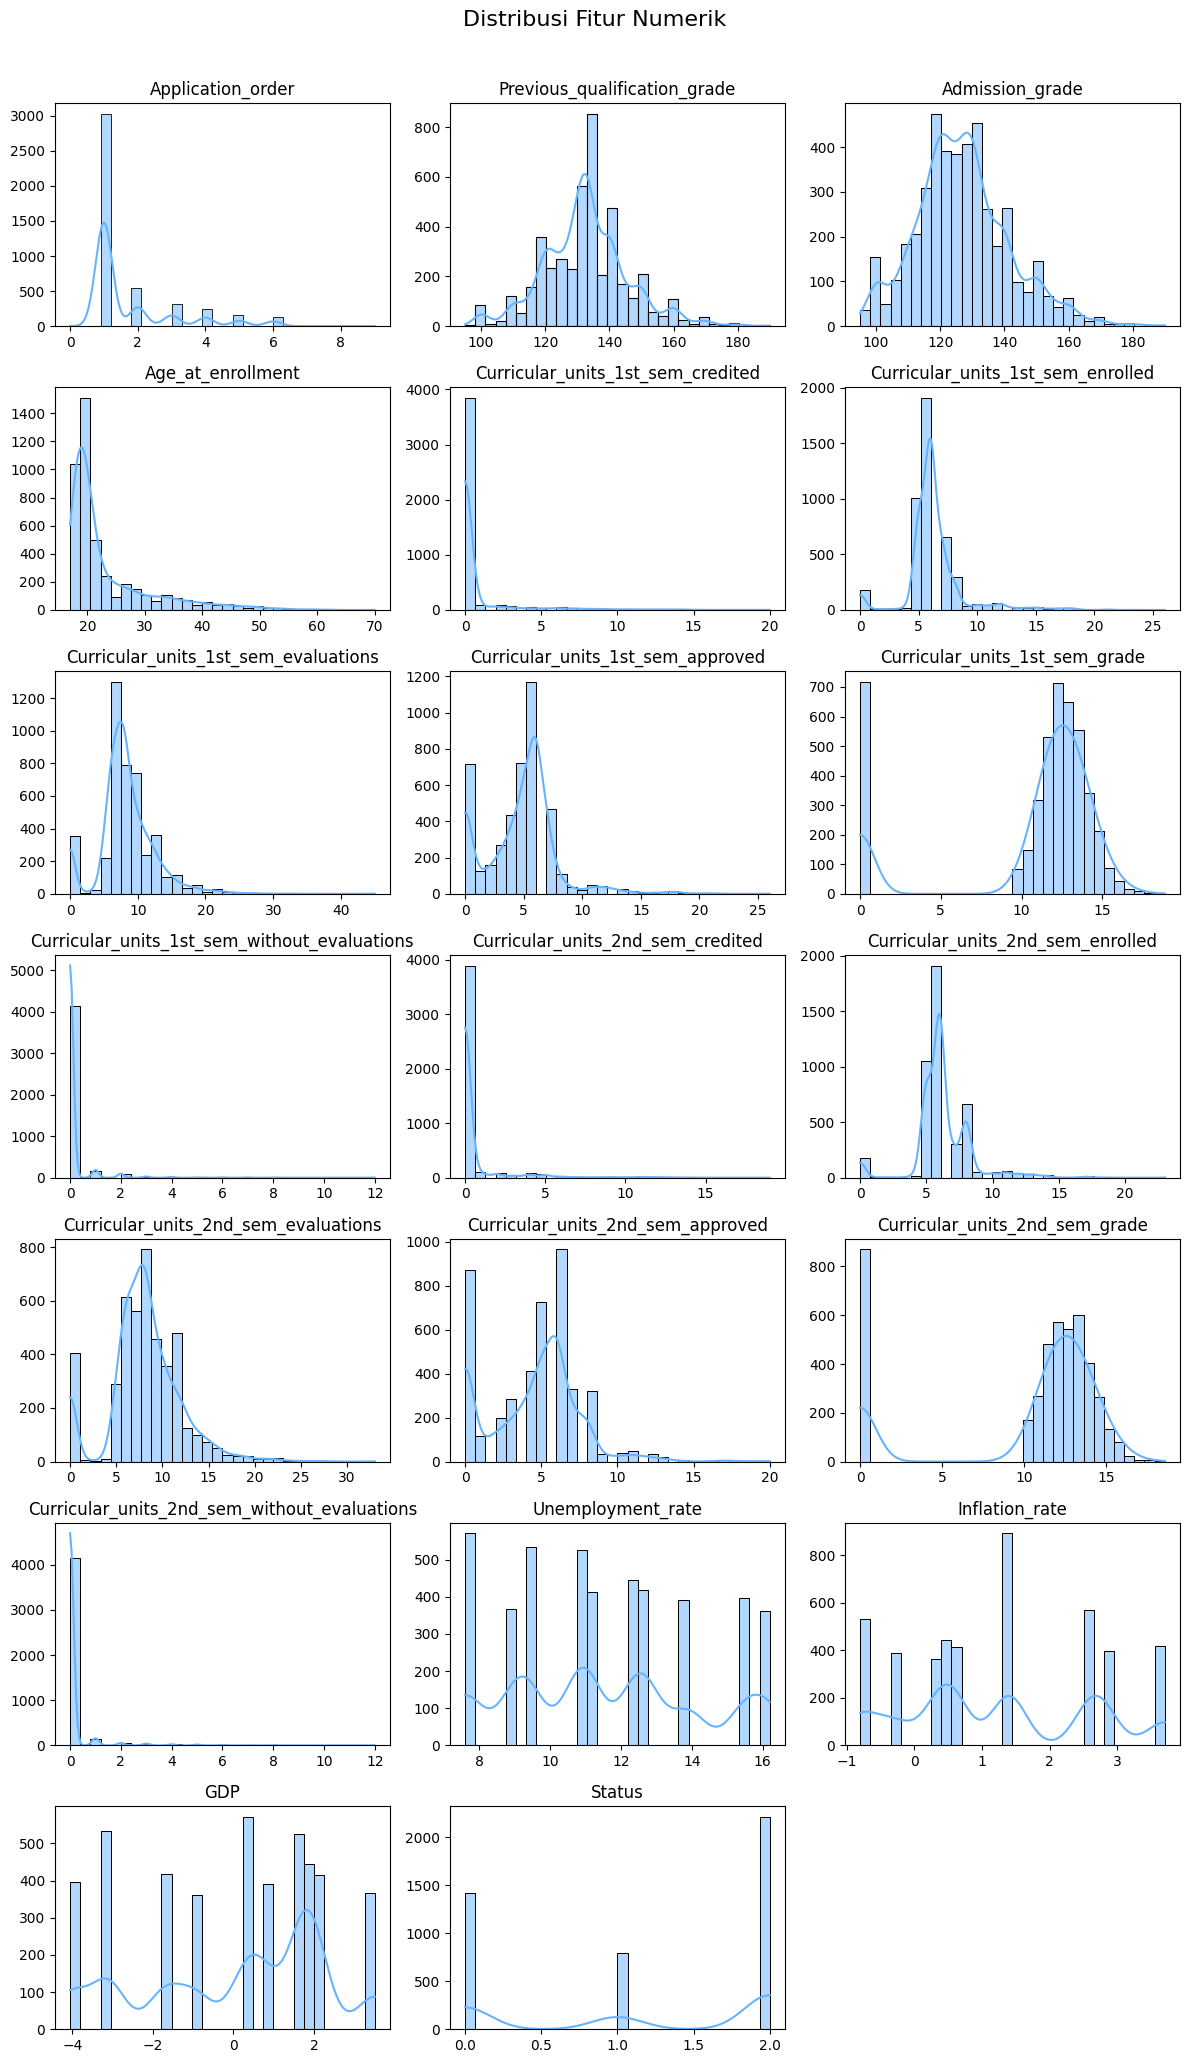

In [ ]:
n_num = len(numerical_cols)
cols = 3
rows = math.ceil(n_num / cols)

plt.figure(figsize=(cols * 4, rows * 3))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_eda[col], kde=True, bins=30, color='#66b3ff')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Distribusi data kategorikal

In [ ]:
# @title Fungsi Pie Plot
# Fungsi untuk membuat pie chart (diagram lingkaran)

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
def pie_plot(data, title):
    data = data.value_counts()
    plt.pie(data, labels=data.index,
            colors=colors,
            autopct=lambda pct: f'{int(pct/100.*data.sum())} ({pct:.2f}%)')
    plt.title(f'Distribution of {title}')
    plt.show()

In [ ]:
# @title Fungsi Count Plot
# Fungsi untuk membuat bar chart horizontal (countplot) dengan anotasi jumlah.

def count_plot(data, y, hue=None, title='Data', figsize=(8, 4), palette=None):
    if palette is None:
        # Warna default sesuai pie chart: [label 2, label 0, label 1]
        palette = ['#ff9999', '#66b3ff', '#99ff99']

    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, y=y, hue=hue,
                       order=data[y].value_counts().index,
                       palette=palette)
    plt.title(f'Distribution of {title}')
    plt.grid()

    if hue:
        plt.legend(loc='lower right')

    for bar in ax.patches:
        if bar.get_width() > 0 and bar.get_height() > 0:
            ax.annotate(
                f'{int(bar.get_width())}',
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                ha='left', va='center', textcoords='offset points', xytext=(5, 0))


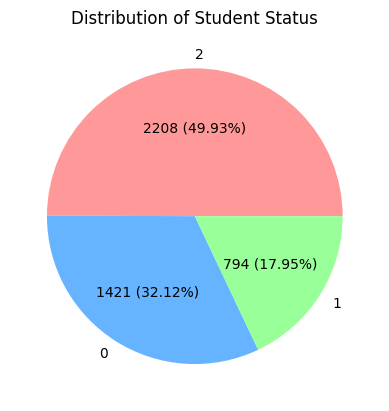

In [ ]:
# distribusi status student
pie_plot(df_eda['Status'], 'Student Status')

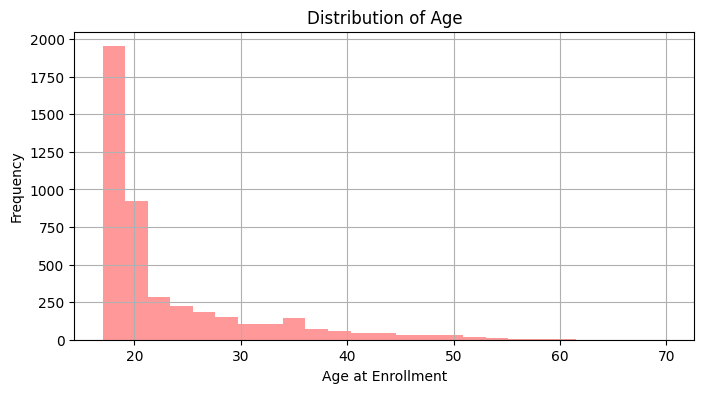

In [ ]:
# Distribution of Age

plt.figure(figsize=(8, 4))
plt.hist(df_eda['Age_at_enrollment'], bins=25, color='#FF9999')
plt.title('Distribution of Age')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.grid()
plt.show()

<ipython-input-22-2438028754>:10: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=data, y=y, hue=hue,
<ipython-input-22-2438028754>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


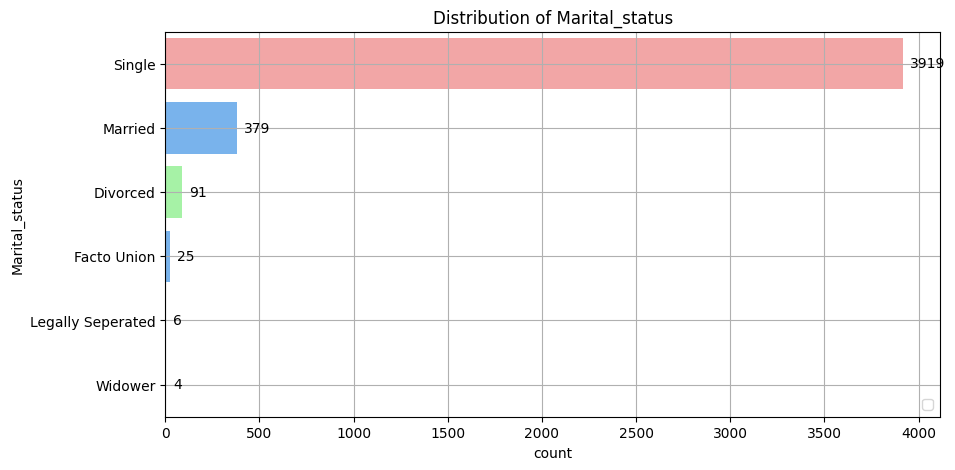

In [ ]:
# distribusi marital status
count_plot(df_eda, 'Marital_status', 'Marital_status', 'Marital_status', (10, 5))

<ipython-input-22-2438028754>:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(data=data, y=y, hue=hue,


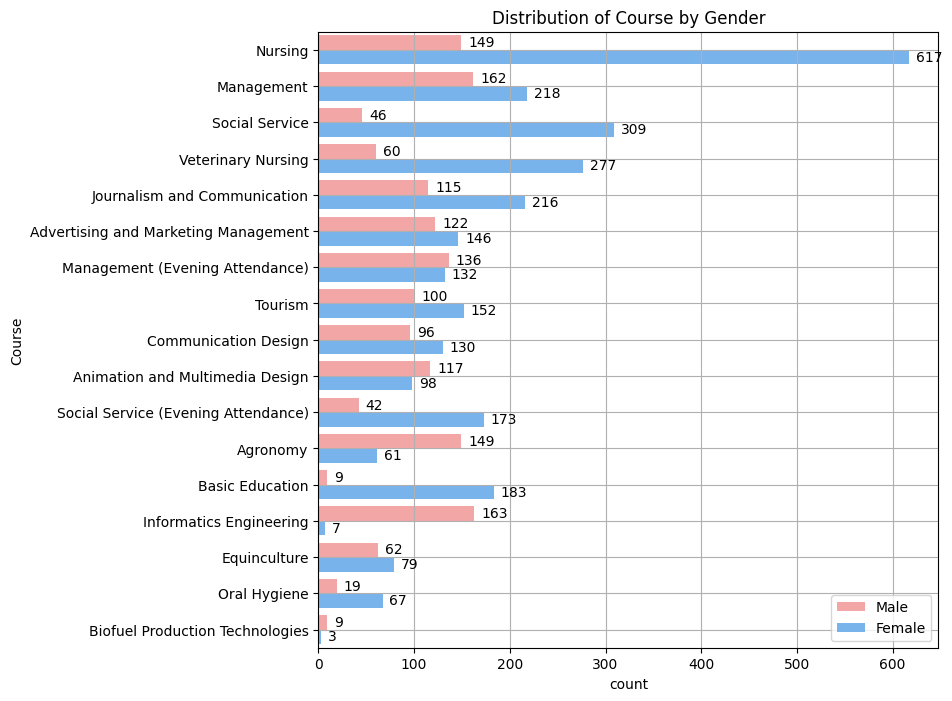

In [ ]:
# distribusi course by gender
count_plot(df_eda, 'Course', 'Gender', 'Course by Gender', (8, 8))

<ipython-input-22-2438028754>:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(data=data, y=y, hue=hue,


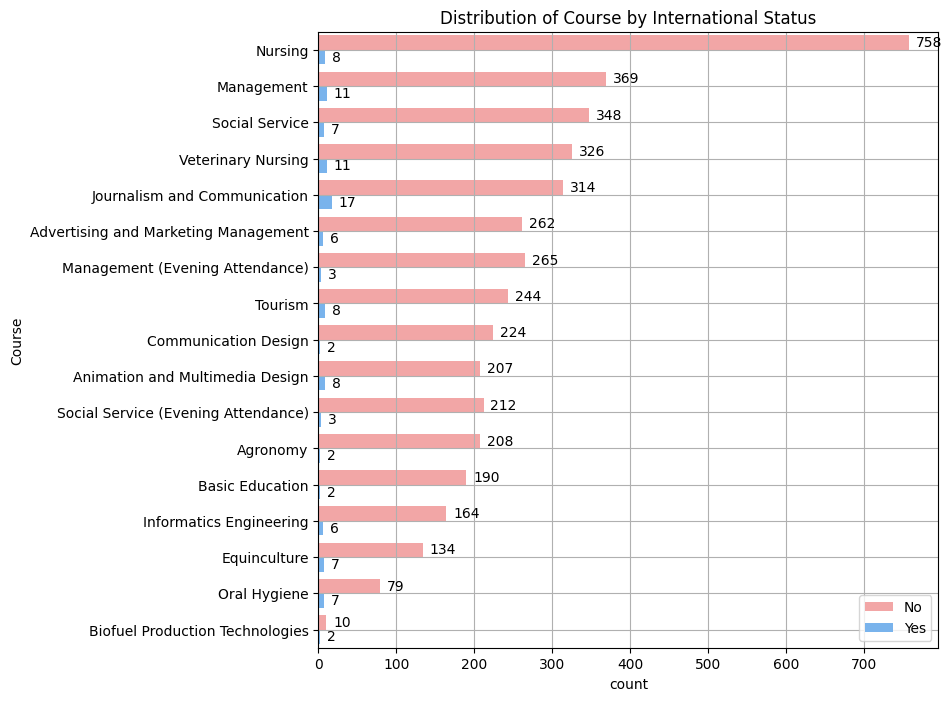

In [ ]:
# distribusi course by international status
count_plot(df_eda, 'Course', 'International', 'Course by International Status', (8, 8))

<ipython-input-22-2438028754>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y=y, hue=hue,
<ipython-input-22-2438028754>:10: UserWarning: 
The palette list has fewer values (3) than needed (21) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=data, y=y, hue=hue,


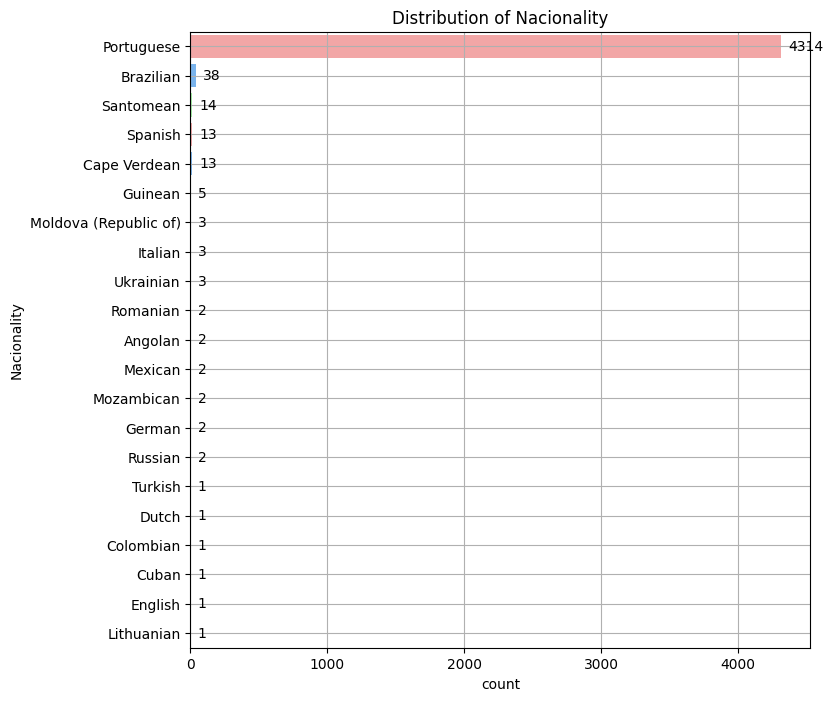

In [ ]:
# distribusi of nationality
count_plot(df_eda, 'Nacionality', title='Nacionality', figsize=(8, 8))

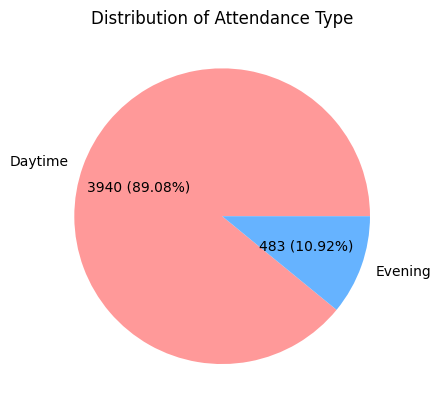

In [ ]:
# distribusi of attendace type
pie_plot(df_eda['Daytime_evening_attendance'], 'Attendance Type')

<ipython-input-22-2438028754>:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(data=data, y=y, hue=hue,


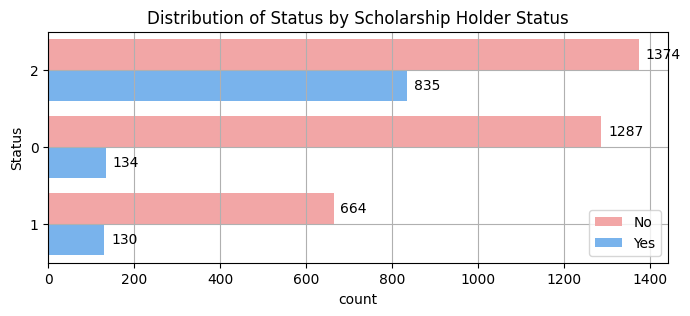

In [ ]:
# distribusi Scholarship_holder
count_plot(df_eda, 'Status', 'Scholarship_holder', 'Status by Scholarship Holder Status', (8, 3))

<ipython-input-22-2438028754>:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(data=data, y=y, hue=hue,


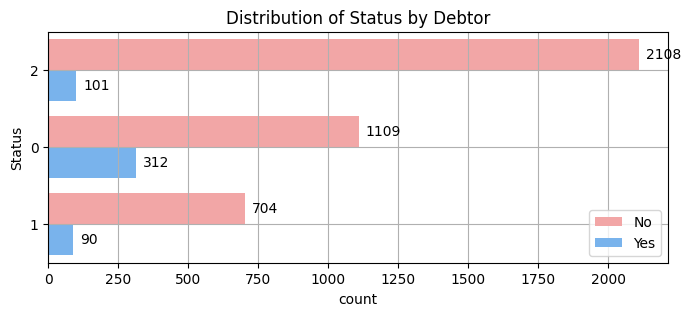

In [ ]:
# disribusi statys by debtor
count_plot(df_eda, 'Status', 'Debtor', 'Status by Debtor', (8, 3))

### Matriks korelasi

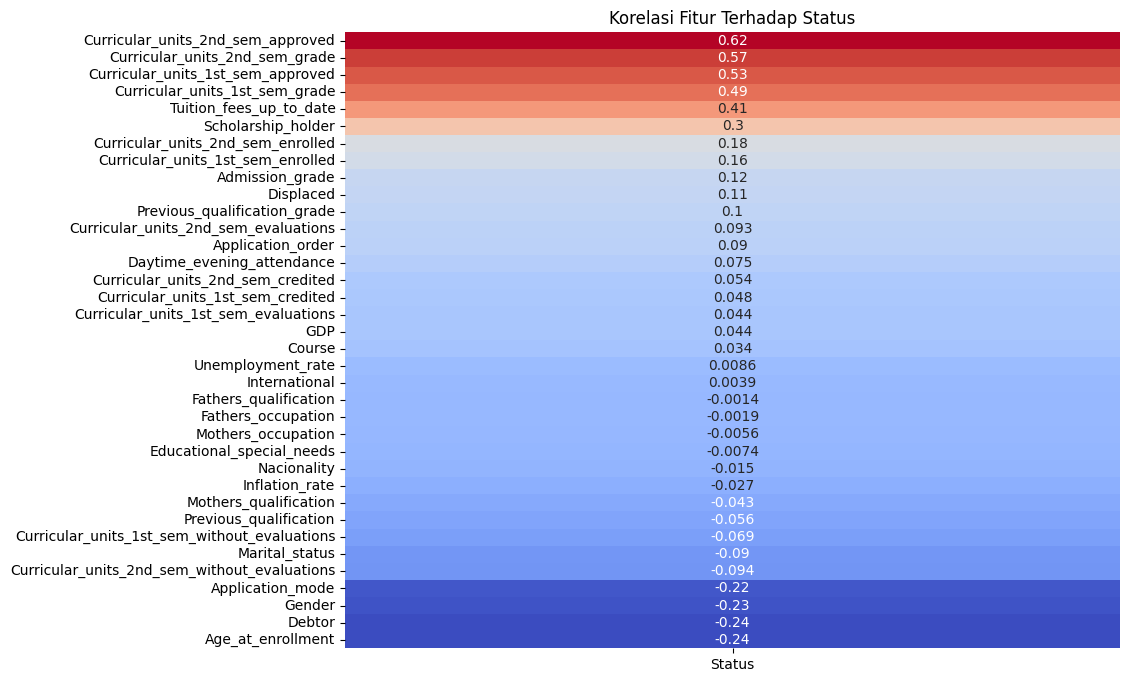

In [ ]:
# Hitung korelasi semua kolom
correlation_matrix = df.corr(numeric_only=True)

# Ambil korelasi terhadap kolom 'Status', lalu drop 'Status' itu sendiri
correlation_with_status = correlation_matrix['Status'].drop('Status').sort_values(ascending=False)

# Tampilkan dalam bentuk heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_status.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Korelasi Fitur Terhadap Status')
plt.show()

#### 🔍 **Analisis Korelasi terhadap Kolom Status (Dropout)**

Berdasarkan heatmap korelasi terhadap kolom `Status`, ditemukan bahwa beberapa fitur memiliki hubungan yang **kuat** terhadap kemungkinan siswa untuk **dropout** atau tidak. Fitur-fitur ini berperan penting dalam membentuk model klasifikasi yang akurat.

---

#### ✅ **Kolom Wajib Digunakan untuk Klasifikasi**

Kolom-kolom berikut menunjukkan korelasi yang paling signifikan (positif maupun negatif), dan **wajib dimasukkan** ke dalam model klasifikasi:

#### 🟢 Korelasi Positif Tinggi (semakin besar nilainya, semakin tidak dropout):

1. `Curricular_units_2nd_sem_approved`
2. `Curricular_units_2nd_sem_grade`
3. `Curricular_units_1st_sem_approved`
4. `Curricular_units_1st_sem_grade`
5. `Tuition_fees_up_to_date`
6. `Scholarship_holder`

#### 🔴 Korelasi Negatif Tinggi (semakin besar nilainya, semakin dropout):

7. `Application_mode`
8. `Gender`
9. `Debtor`
10. `Age_at_enrollment`

# **Data Preprocessing**

## **Feature Selection**

In [ ]:
df_data = pd.read_csv('students_performance_clean.csv')

In [ ]:
# lihat data untuk modeling
df_data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
# cek jumlah data status
df_data['Status'].value_counts()

,count
Status,
2,2209
0,1421
1,794


In [ ]:
# amabil ata graduate dan dropout saja karena tujuan klasifikasi untuk menetukan siswa dropout atau graduate
df_data = df_data[df_data['Status'] != 1]
df_data = df_data.reset_index(drop=True)

df_data.loc[:, 'Status'] = df_data['Status'].replace({2: 1})

In [ ]:
# cek jumlah data status
df_data['Status'].value_counts()

,count
Status,
1,2209
0,1421


In [ ]:
# memfilter kolom-kolom dalam DataFrame df yang memiliki korelasi absolut terhadap kolom Status sebesar ≥ 0.1
df_filtered = df_data.loc[:, df_data.corr()['Status'].abs().ge(0.1)]
df_filtered.head()

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1


In [ ]:
df_filtered.describe()

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,132.920606,127.293939,0.549036,0.113774,0.866116,0.344077,0.266942,23.461157,6.337466,4.791460,10.534860,6.296419,7.763085,4.518457,10.036155,0.142149,0.608540
std,0.613009,17.358595,13.238373,14.611295,0.497658,0.317580,0.340575,0.475132,0.442423,7.827994,2.570773,3.237845,5.057694,2.263020,3.964163,3.162376,5.481742,0.747670,0.488144
min,1.000000,1.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,125.000000,118.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,5.000000,3.000000,11.000000,5.000000,6.000000,2.000000,10.517857,0.000000,0.000000
50%,1.000000,17.000000,133.100000,126.500000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,6.000000,5.000000,12.341429,6.000000,8.000000,5.000000,12.333333,0.000000,1.000000
75%,1.000000,39.000000,140.000000,135.100000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,7.000000,6.000000,13.500000,7.000000,10.000000,6.000000,13.500000,0.000000,1.000000
max,6.000000,57.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,26.000000,26.000000,18.875000,23.000000,33.000000,20.000000,18.571429,12.000000,1.000000


In [ ]:
df_filtered.to_csv('student_data_final.csv', index=False)

## **Fitur And Label Slection**

In [ ]:
data = pd.read_csv('student_data_final.csv')

In [ ]:
# split dataset
X = data.drop(['Status'], axis=1)
y = data['Status']

## **Data Oversampling**

In [ ]:
# data oversampling
smote = SMOTE(random_state=20241124)
X_smote, y_smote = smote.fit_resample(X, y)

y_counter = collections.Counter(y)
y_smote_counter = collections.Counter(y_smote)

df_comparison = pd.DataFrame({
    'None': y_counter,
    'SMOTE': y_smote_counter
})

df_comparison.loc['Total'] = [sum(y_counter.values()), sum(y_smote_counter.values())]
df_comparison

,None,SMOTE
0,1421,2209
1,2209,2209
Total,3630,4418


## **Train-Test Split**

In [ ]:
# split dataset 80 training 20 testing
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=20241116, stratify=y_smote)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (3534, 18)
y_train : (3534,)
X_test  : (884, 18)
y_test  : (884,)


## **Standardization Data**

In [ ]:
# standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train:\n{X_train}\n')
print(f'X_test:\n{X_test}')

X_train:
[[-0.29437224  1.43984557  0.56572219 ... -0.00432693  0.60159057
  -0.18461772]
 [-0.29437224 -1.03991657  0.41333811 ...  0.61980994  0.65521521
  -0.18461772]
 [-0.29437224  1.15150114  1.3276426  ...  0.30774151  0.77970097
  -0.18461772]
 ...
 [-0.29437224 -0.69390325  0.56572219 ...  0.61980994  0.90897465
  -0.18461772]
 [-0.29437224 -1.03991657 -1.72003903 ...  0.61980994  0.43497116
  -0.18461772]
 [-0.29437224 -1.03991657  0.26095403 ...  0.61980994  0.61451794
  -0.18461772]]

X_test:
[[-0.29437224 -1.03991657 -2.4057674  ...  0.61980994  0.63606355
  -0.18461772]
 [-0.29437224  1.3245078  -0.65335046 ...  1.2439468   0.61645704
  -0.18461772]
 [-0.29437224  1.43984557  0.56572219 ... -1.25260065 -1.6046802
  -0.18461772]
 ...
 [ 1.45699391 -0.69390325 -0.95811862 ... -0.62846379  0.46369865
  -0.18461772]
 [-0.29437224 -1.03991657 -0.31926549 ... -1.25260065 -1.6046802
  -0.18461772]
 [-0.29437224 -0.52089659  0.56572219 ...  0.93187837  0.34796793
  -0.18461772]]


# **Modelling**

## Model Selection

In [ ]:
# Define the models
models = {
    'LR': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SVM': SVC(class_weight='balanced', max_iter=10000),
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB()
}

# Define the metrics
metrics = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']}

# Fit models and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred))
    metrics['Recall'].append(recall_score(y_test, pred))
    metrics['F1-Score'].append(f1_score(y_test, pred))

In [ ]:
# Create a DataFrame from the collected metrics
model_metrics = pd.DataFrame(metrics, index=models.keys())
model_metrics

,Accuracy,Precision,Recall,F1-Score
LR,0.910633,0.900662,0.923077,0.911732
SVM,0.912896,0.887473,0.945701,0.915663
DT,0.857466,0.883495,0.823529,0.852459
GB,0.911765,0.893939,0.934389,0.913717
RF,0.918552,0.900433,0.941176,0.920354
KNN,0.889140,0.859833,0.929864,0.893478
NB,0.846154,0.808468,0.907240,0.855011


**Analisa:**

Dari hasil seleksi model diatas hasil terbaik itu Logistic Regresi dan Random Forest maka dari itu akan dicoba dua model itu untuk menentukan model terbaik

## Model Logistic Regresion

In [ ]:
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_train_lr = model_lr.predict(X_train)
y_test_lr = model_lr.predict(X_test)

## Model Random Forest

In [ ]:
model_rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
y_train_rf = model_rf.predict(X_train)
y_test_rf = model_rf.predict(X_test)

# **Evaluation**

## Evaluasi Model Logistic Regresion

In [ ]:
# Evaluation Report Model
def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Status', fontsize=10)
    plt.xlabel('Predicted Label Status', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1767
           1       0.89      0.94      0.91      1767

    accuracy                           0.91      3534
   macro avg       0.91      0.91      0.91      3534
weighted avg       0.91      0.91      0.91      3534



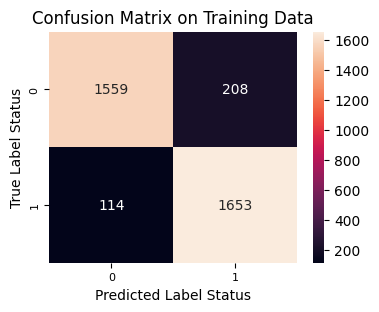

In [ ]:
evaluation_report(y_train, y_train_lr, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       442
           1       0.90      0.92      0.91       442

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



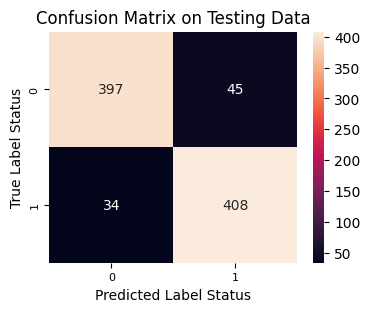

In [ ]:
evaluation_report(y_test, y_test_lr, title='Testing Data')

**Analisa Model Logistic Regression**

* **Akurasi Konsisten**: Akurasi pada data training dan testing sama-sama 91%, menunjukkan model tidak overfitting maupun underfitting.

* **Performa Seimbang Antar Kelas**: Nilai precision, recall, dan f1-score untuk kelas 0 dan 1 hampir setara, menandakan model mampu mengenali kedua kelas secara adil.

* **Precision dan Recall Tinggi**:

  * Kelas 0: Precision 0.92, Recall 0.90 → sedikit kesalahan saat memprediksi kelas 0.
  * Kelas 1: Precision 0.90, Recall 0.92 → model cukup baik menangkap kelas 1.

* **F1-score Stabil**: F1-score untuk semua kelas bernilai 0.91, baik pada training maupun testing, menunjukkan keseimbangan antara precision dan recall.

* **Distribusi Data Sudah Seimbang**: Nilai macro avg dan weighted avg identik, mengindikasikan bahwa kelas target sudah seimbang—kemungkinan hasil dari proses oversampling seperti SMOTE.

* **Model Layak Digunakan**: Dengan performa yang stabil dan metrik yang seimbang, model logistic regression ini sudah layak untuk diimplementasikan pada data nyata.


## Evaluasi Model Random Forest

In [ ]:
# Evaluation Report Model
def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Status', fontsize=10)
    plt.xlabel('Predicted Label Status', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1767
           1       1.00      1.00      1.00      1767

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534



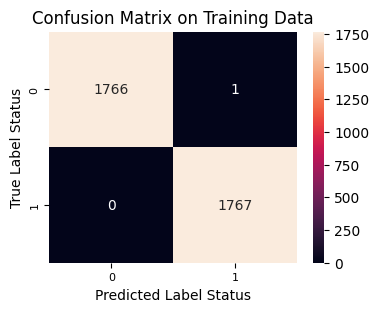

In [ ]:
evaluation_report(y_train, y_train_rf, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       442
           1       0.90      0.94      0.92       442

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



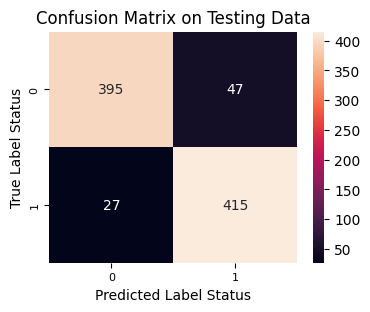

In [ ]:
evaluation_report(y_test, y_test_rf, title='Testing Data')

**Analisa Model Random Forest**

* **Akurasi Tinggi**: Akurasi pada data training mencapai 100%, sementara pada testing sebesar 92%, menunjukkan model sangat kuat pada pelatihan namun perlu perhatian terhadap potensi overfitting.

* **Performa Training Sempurna**: Precision, recall, dan f1-score semuanya 1.00 pada data training, mengindikasikan model menghafal data pelatihan (overfitting sangat mungkin terjadi).

* **Performa Testing Tetap Baik**:

  * Kelas 0: Precision 0.94, Recall 0.89 → beberapa kesalahan memprediksi kelas 0 (false negatives).
  * Kelas 1: Precision 0.90, Recall 0.94 → model sangat baik dalam mengenali kelas 1.

* **F1-score Tinggi dan Seimbang**: F1-score untuk kedua kelas pada data testing masing-masing 0.91 dan 0.92, menunjukkan keseimbangan antara precision dan recall.

* **Distribusi Kelas Sudah Seimbang**: Macro dan weighted average identik, mengindikasikan jumlah data di tiap kelas seimbang setelah proses resampling.

* **Perlu Penanganan Overfitting**: Meskipun performa testing baik, gap besar antara training (100%) dan testing (92%) mengindikasikan model bisa terlalu kompleks; tuning parameter atau pruning bisa dipertimbangkan.

* **Model Kuat untuk Produksi**: Meski ada indikasi overfitting, performa pada data testing tetap tinggi dan stabil, membuat model ini layak digunakan dengan pemantauan lebih lanjut.


# **Hyperparameter Tuning**

## Tunning Logistic Regresion

In [ ]:
# Model dasar
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)

# Hyperparameter Tuning grid
param_grid = {
    'penalty': ['l1', 'l2'],            # L1 = Lasso, L2 = Ridge
    'C': [0.01, 0.1, 1, 10, 100]        # Regularization strength (kebalikan dari lambda)
}

# GridSearchCV
grid_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Hasil
print("Best Parameters:", grid_lr.best_params_)
print("Best CV Score:", grid_lr.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l1'}
Best CV Score: 0.9074684158015153


In [ ]:
# Predict the training and testing data using the best model
y_train_best = grid_lr.predict(X_train)
y_test_best = grid_lr.predict(X_test)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1767
           1       0.89      0.94      0.91      1767

    accuracy                           0.91      3534
   macro avg       0.91      0.91      0.91      3534
weighted avg       0.91      0.91      0.91      3534



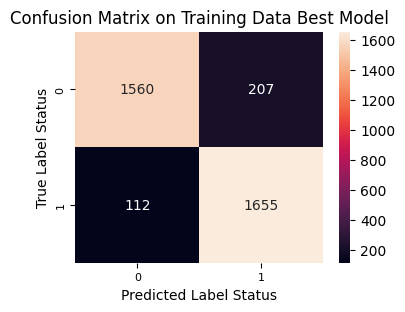

In [ ]:
evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       442
           1       0.90      0.93      0.91       442

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



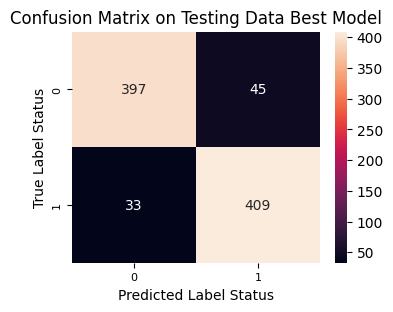

In [ ]:
evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

**Analisa Model Logistic Regression (Dengan Hyperparameter Tuning)**

* **Akurasi Konsisten dan Stabil**: Akurasi pada data training dan testing sama-sama 91%, menunjukkan bahwa tuning berhasil menjaga generalisasi model tanpa overfitting.

* **Performa Seimbang Setelah Tuning**: Hasil precision, recall, dan f1-score pada kedua kelas tetap tinggi dan seimbang, menunjukkan bahwa tuning tidak mengorbankan performa salah satu kelas.

* **Performa Tiap Kelas**:

  * Kelas 0: Precision 0.92, Recall 0.90 → model cukup baik dalam mengenali kelas 0, dengan sedikit false negatives.
  * Kelas 1: Precision 0.90, Recall 0.93 → performa meningkat dibanding logistic regression tanpa tuning, terutama dalam recall kelas 1.

* **F1-score Konsisten**: Nilai f1-score tetap 0.91 untuk kedua kelas baik di training maupun testing, menandakan keseimbangan yang terjaga antara precision dan recall.

* **Distribusi Kelas Tertangani Baik**: Macro dan weighted average sama, menunjukkan bahwa data sudah seimbang antar kelas, kemungkinan besar berkat oversampling.

* **Efektivitas Hyperparameter Tuning**: Tuning tidak memberikan lonjakan performa drastis, tetapi berhasil **menstabilkan dan mempertahankan kualitas model**, terutama dalam hal keseimbangan metrik.

* **Model Siap Produksi**: Dengan performa yang konsisten, tuning yang tepat, dan keseimbangan antar kelas yang terjaga, model ini sangat cocok untuk digunakan dalam deployment sistem prediktif.


## Tunning Random Forest

In [ ]:
# Model dasar
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Hyperparameter Tuning grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Hasil
print("Best Parameters:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best CV Score: 0.9134114139864007


In [ ]:
# Predict the training and testing data using the best model
y_train_best = grid_rf.predict(X_train)
y_test_best = grid_rf.predict(X_test)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1767
           1       0.95      0.98      0.97      1767

    accuracy                           0.97      3534
   macro avg       0.97      0.97      0.97      3534
weighted avg       0.97      0.97      0.97      3534



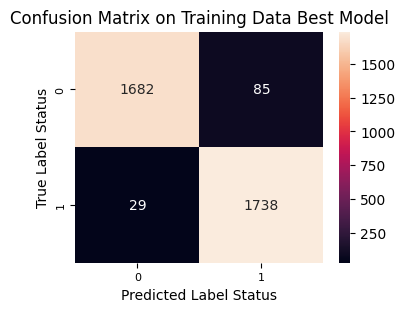

In [ ]:
evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       442
           1       0.89      0.94      0.92       442

    accuracy                           0.91       884
   macro avg       0.92      0.91      0.91       884
weighted avg       0.92      0.91      0.91       884



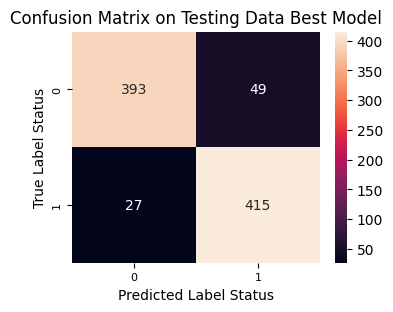

In [ ]:
evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

**Analisa Model Random Forest (Dengan Hyperparameter Tuning)**

* **Akurasi Tinggi dan Konsisten**: Akurasi training mencapai 97%, sedangkan testing 91%. Tuning berhasil menurunkan overfitting dibanding model awal yang memiliki akurasi 100% di training.

* **Performa Training Sangat Baik**:

  * Kelas 0: Precision 0.98, Recall 0.95
  * Kelas 1: Precision 0.95, Recall 0.98
    Menunjukkan bahwa model belajar dengan sangat baik, namun tidak sampai menghafal data seperti sebelumnya.

* **Performa Testing Tetap Stabil**:

  * Kelas 0: Precision 0.94, Recall 0.89 → masih ada false negatives untuk kelas 0.
  * Kelas 1: Precision 0.89, Recall 0.94 → model cukup kuat dalam mendeteksi kelas 1.

* **F1-score Seimbang**: F1-score di atas 0.91 untuk kedua kelas pada data testing, menandakan keseimbangan precision dan recall yang baik setelah tuning.

* **Macro dan Weighted Avg Sejalan**: Nilai rata-rata menunjukkan distribusi kelas yang seimbang dan penanganan yang adil oleh model.

* **Efektivitas Hyperparameter Tuning**: Tuning meningkatkan generalisasi model secara signifikan. Akurasi training dikurangi ke tingkat yang lebih realistis (97%), sementara akurasi testing tetap tinggi (91%) — indikasi **overfitting berhasil dikendalikan**.

* **Model Andal dan Siap Digunakan**: Performa kuat di kedua dataset dan peningkatan kestabilan model menjadikan random forest hasil tuning ini layak digunakan dalam sistem prediktif yang andal.


# **Kesimpulan**

## **Analisis Model Terbaik untuk Prediksi Dropout Mahasiswa**

Berdasarkan hasil pelatihan dan evaluasi terhadap empat model klasifikasi, yaitu **Logistic Regression**, **Random Forest**, serta masing-masing versi dengan **hyperparameter tuning**, diperoleh bahwa model **Random Forest dengan Hyperparameter Tuning** memberikan performa terbaik dan paling layak digunakan dalam lingkungan produksi. Berikut adalah analisis lengkapnya:

### **1. Kinerja Model**

Model Random Forest hasil tuning menunjukkan performa yang sangat tinggi baik pada data pelatihan maupun pengujian:

| Metrik Evaluasi     | Training Data | Testing Data |
| ------------------- | ------------- | ------------ |
| Akurasi             | 97%           | 91%          |
| Precision (kelas 1) | 0.95          | 0.89         |
| Recall (kelas 1)    | 0.98          | 0.94         |
| F1-Score (kelas 1)  | 0.97          | 0.92         |

> *Catatan: Kelas 1 merepresentasikan siswa yang berpotensi dropout.*

### **2. Kemampuan Generalisasi**

Setelah dilakukan tuning, model ini berhasil menurunkan tingkat overfitting yang sebelumnya terjadi pada model Random Forest awal (yang mencapai 100% akurasi di data pelatihan). Hal ini meningkatkan kepercayaan bahwa model tidak hanya menghafal data pelatihan, tetapi juga mampu mengenali pola pada data baru secara efektif.

### **3. Keseimbangan dalam Klasifikasi**

F1-score untuk kedua kelas (dropout dan tidak dropout) berada di atas 0.91, menunjukkan bahwa model memiliki **kemampuan prediksi yang seimbang** antara menghindari false positive dan false negative. Ini sangat penting untuk konteks pendidikan, di mana kedua kesalahan prediksi dapat berdampak signifikan.

### **4. Interpretabilitas dan Aplikasi Nyata**

Random Forest juga memungkinkan dilakukan analisis **feature importance**, yang bermanfaat bagi pihak institusi untuk:

* Mengidentifikasi faktor-faktor utama penyebab dropout.
* Merancang intervensi yang tepat sasaran berdasarkan fitur yang paling berpengaruh.

### **5. Kelayakan untuk Produksi**

Dengan akurasi tinggi, performa stabil, dan interpretabilitas yang baik, model ini sangat layak untuk digunakan sebagai sistem pendukung keputusan dalam mendeteksi siswa berisiko tinggi dropout. Model dapat diintegrasikan ke dalam sistem informasi akademik untuk memberikan **peringatan dini** dan **rekomendasi intervensi**.

---

### **Kesimpulan**

Model **Random Forest dengan Hyperparameter Tuning** dipilih sebagai **model terbaik** untuk tugas prediksi dropout mahasiswa di Jaya Jaya Institut. Model ini mampu mengenali pola dropout secara akurat, seimbang, dan dapat diandalkan untuk mendukung sistem bimbingan akademik preventif.

# **Model Export**

In [ ]:
joblib.dump(grid_rf, 'model_rf.joblib')

['model_rf.joblib']

In [ ]:
!pip freeze > requirements.txt

In [ ]:
files.download('students_performance.csv')
files.download('students_performance_clean.csv')
files.download('model_rf.joblib')
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>